### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [109]:
tf.__version__

'1.14.0'

In [0]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

### Collect Data

In [0]:
import keras

In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [113]:
print(testY[0:5])

[9 2 1 1 6]


In [114]:
trainX.shape

(60000, 28, 28)

In [115]:
trainY.shape

(60000,)

In [116]:
testX.shape

(10000, 28, 28)

In [117]:
testY.shape

(10000,)

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [118]:
 tf.keras.utils.to_categorical(trainY)

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [119]:
 tf.keras.utils.to_categorical(testY)

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [120]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000,)
First 5 examples now are:  [9 0 0 3 0]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

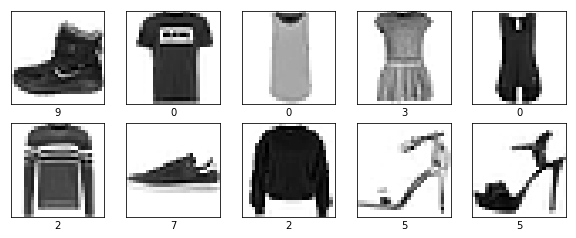

In [121]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(trainY[i])
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))


In [0]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='sigmoid'))

In [0]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='sigmoid'))

In [0]:
#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='sigmoid'))

In [0]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
#Compile the model
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [129]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_24 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_25 (Dense)             (None, 60)                6060      
_________________________________________________________________
dense_26 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_27 (Dense)             (None, 10)                310       
Total params: 185,300
Trainable params: 185,300
Non-trainable params: 0
________________________________________________

### Execute the model using model.fit()

In [130]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=15,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 77us/sample - loss: 2.2685 - acc: 0.2086 - val_loss: 2.1789 - val_acc: 0.1989
Epoch 2/15
60000/60000 [==============================] - 4s 71us/sample - loss: 1.9267 - acc: 0.2668 - val_loss: 1.7286 - val_acc: 0.2684
Epoch 3/15
60000/60000 [==============================] - 4s 71us/sample - loss: 1.6609 - acc: 0.3436 - val_loss: 1.6066 - val_acc: 0.4179
Epoch 4/15
60000/60000 [==============================] - 4s 70us/sample - loss: 1.5504 - acc: 0.4283 - val_loss: 1.4851 - val_acc: 0.4058
Epoch 5/15
60000/60000 [==============================] - 4s 70us/sample - loss: 1.4147 - acc: 0.4385 - val_loss: 1.3600 - val_acc: 0.4831
Epoch 6/15
60000/60000 [==============================] - 4s 70us/sample - loss: 1.3133 - acc: 0.4544 - val_loss: 1.2840 - val_acc: 0.5598
Epoch 7/15
60000/60000 [==============================] - 4s 70us/sample - loss: 1.2455 - acc: 0.5040 - val_loss: 1.

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
#Initialize Sequential model
model2 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model2.add(tf.keras.layers.BatchNormalization())


In [0]:

#Add layers
model2.add(tf.keras.layers.Dense(200, activation='sigmoid'))
model2.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model2.add(tf.keras.layers.Dense(60, activation='sigmoid'))
model2.add(tf.keras.layers.Dense(30, activation='sigmoid'))
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
#Compile the model
model2.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [137]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 784)               3136      
_________________________________________________________________
dense_28 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_29 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_30 (Dense)             (None, 60)                6060      
_________________________________________________________________
dense_31 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_32 (Dense)             (None, 10)               

### Execute the model

In [139]:
model2.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=15,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 6s 104us/sample - loss: 2.2231 - acc: 0.3083 - val_loss: 2.1259 - val_acc: 0.3861
Epoch 2/15
60000/60000 [==============================] - 6s 104us/sample - loss: 1.9172 - acc: 0.3510 - val_loss: 1.7200 - val_acc: 0.4797
Epoch 3/15
60000/60000 [==============================] - 6s 104us/sample - loss: 1.6116 - acc: 0.4395 - val_loss: 1.4693 - val_acc: 0.5551
Epoch 4/15
60000/60000 [==============================] - 6s 104us/sample - loss: 1.3581 - acc: 0.5236 - val_loss: 1.2408 - val_acc: 0.5640
Epoch 5/15
60000/60000 [==============================] - 6s 107us/sample - loss: 1.1994 - acc: 0.5624 - val_loss: 1.1234 - val_acc: 0.5807
Epoch 6/15
60000/60000 [==============================] - 6s 101us/sample - loss: 1.1007 - acc: 0.5891 - val_loss: 1.0342 - val_acc: 0.6144
Epoch 7/15
60000/60000 [==============================] - 6s 99us/sample - loss: 1.0173 - acc: 0.6314 - val_lo

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
# Create an optimizer with the desired parameters.
opt = tf.keras.optimizers.SGD(learning_rate=0.001)

In [0]:
#Compile the model
model2.compile(optimizer=opt, loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [142]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 784)               3136      
_________________________________________________________________
dense_28 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_29 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_30 (Dense)             (None, 60)                6060      
_________________________________________________________________
dense_31 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_32 (Dense)             (None, 10)               

In [143]:
model2.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=15,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 6s 97us/sample - loss: 0.6441 - acc: 0.7710 - val_loss: 0.6244 - val_acc: 0.7788
Epoch 2/15
60000/60000 [==============================] - 6s 95us/sample - loss: 0.6414 - acc: 0.7715 - val_loss: 0.6235 - val_acc: 0.7788
Epoch 3/15
60000/60000 [==============================] - 6s 95us/sample - loss: 0.6407 - acc: 0.7729 - val_loss: 0.6222 - val_acc: 0.7804
Epoch 4/15
60000/60000 [==============================] - 6s 93us/sample - loss: 0.6390 - acc: 0.7738 - val_loss: 0.6197 - val_acc: 0.7803
Epoch 5/15
60000/60000 [==============================] - 6s 102us/sample - loss: 0.6379 - acc: 0.7738 - val_loss: 0.6175 - val_acc: 0.7813
Epoch 6/15
60000/60000 [==============================] - 6s 94us/sample - loss: 0.6376 - acc: 0.7724 - val_loss: 0.6164 - val_acc: 0.7815
Epoch 7/15
60000/60000 [==============================] - 6s 97us/sample - loss: 0.6290 - acc: 0.7765 - val_loss: 0

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Initialize Sequential model
model3 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model3.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model3.add(tf.keras.layers.BatchNormalization())



#Add layers
model3.add(tf.keras.layers.Dense(200, activation='sigmoid'))
model3.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model3.add(tf.keras.layers.Dense(10, activation='softmax'))

# Create an optimizer with the desired parameters.
opt = tf.keras.optimizers.SGD(learning_rate=0.03)

#Compile the model
model3.compile(optimizer=opt, loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


In [145]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 784)               3136      
_________________________________________________________________
dense_33 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_34 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_35 (Dense)             (None, 10)                1010      
Total params: 181,246
Trainable params: 179,678
Non-trainable params: 1,568
_________________________________________________________________


## Review model

In [146]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 784)               3136      
_________________________________________________________________
dense_33 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_34 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_35 (Dense)             (None, 10)                1010      
Total params: 181,246
Trainable params: 179,678
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [147]:
model3.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=15,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 6s 95us/sample - loss: 0.9589 - acc: 0.7098 - val_loss: 0.5992 - val_acc: 0.7859
Epoch 2/15
60000/60000 [==============================] - 5s 89us/sample - loss: 0.5480 - acc: 0.8062 - val_loss: 0.4991 - val_acc: 0.8192
Epoch 3/15
60000/60000 [==============================] - 5s 88us/sample - loss: 0.4790 - acc: 0.8289 - val_loss: 0.4599 - val_acc: 0.8334
Epoch 4/15
60000/60000 [==============================] - 5s 87us/sample - loss: 0.4487 - acc: 0.8396 - val_loss: 0.4393 - val_acc: 0.8374
Epoch 5/15
60000/60000 [==============================] - 6s 92us/sample - loss: 0.4262 - acc: 0.8486 - val_loss: 0.4228 - val_acc: 0.8456
Epoch 6/15
60000/60000 [==============================] - 6s 96us/sample - loss: 0.4092 - acc: 0.8539 - val_loss: 0.4123 - val_acc: 0.8502
Epoch 7/15
60000/60000 [==============================] - 6s 94us/sample - loss: 0.3989 - acc: 0.8561 - val_loss: 0.